In [1]:
import pandas as pd

df = pd.read_csv('output.csv')
df.drop(columns=["seed", "total_time"], inplace=True)

print(df.head())

  type  pk_amount  cpu_time  access_time  accesses_amount
0    L         10  1246.350     9682.450         99227.40
1    L         10  1261.700     9675.650         99072.80
2    L         10  1262.600     9673.850        101671.40
3    L         20   633.825     9846.475         47525.90
4    L         20   630.275     9839.825         44452.15


In [2]:
df = df.groupby(["type", "pk_amount"]).agg(["mean", "std"])
df

cpu_time            access_time            accesses_amount  \
                       mean       std         mean        std            mean   
type pk_amount                                                                  
C    10          611.466667  1.586138  9922.433333  28.094231    35449.850000   
     20          313.208333  1.287035  9922.358333  35.694820    18004.841667   
     30          221.572222  0.630329  9952.883333  25.030920    12614.388889   
     40          168.087500  0.188746  9900.691667  31.005152     9590.737500   
     50          134.476667  0.604759  9936.026667  11.345309     7613.606667   
L    10         1256.883333  9.133227  9677.316667   4.535784    99990.533333   
     20          633.141667  2.593421  9846.225000   6.278734    47708.200000   
     30          420.955556  1.826452  9911.400000   1.184037    30997.366667   
     40          315.195833  1.485573  9941.558333   2.301030    23083.137500   
     50          252.966667  1.033650  9972.310000  14.897090    18384.830000   

                             
                        std  
type pk_amount               
C    10          449.094066  
     20           76.202921  
     30           55.935629  
     40           29.084758  
     50           40.345622  
L    10         1457.724203  
     20         3350.921188  
     30          436.784930  
     40          142.433930  
     50          151.670994

In [3]:
df_c = df.loc['C'].reset_index()
df_l = df.loc['L'].reset_index()
df_c

pk_amount    cpu_time            access_time            accesses_amount  \
                   mean       std         mean        std            mean   
0        10  611.466667  1.586138  9922.433333  28.094231    35449.850000   
1        20  313.208333  1.287035  9922.358333  35.694820    18004.841667   
2        30  221.572222  0.630329  9952.883333  25.030920    12614.388889   
3        40  168.087500  0.188746  9900.691667  31.005152     9590.737500   
4        50  134.476667  0.604759  9936.026667  11.345309     7613.606667   

               
          std  
0  449.094066  
1   76.202921  
2   55.935629  
3   29.084758  
4   40.345622

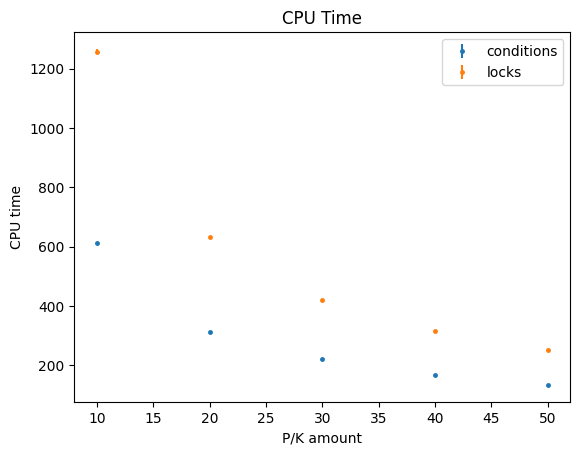

In [4]:
import matplotlib.pyplot as plt

plt.title("CPU Time")
plt.xlabel("P/K amount")
plt.ylabel("CPU time")
c = plt.errorbar(
    df_c["pk_amount"], 
    df_c["cpu_time"]["mean"], 
    df_c["cpu_time"]["std"],
    label="conditions",
    linestyle='None', 
    marker='.',
    ms=5
)
l = plt.errorbar(
    df_l["pk_amount"], 
    df_l["cpu_time"]["mean"], 
    df_l["cpu_time"]["std"], 
    label="locks",
    linestyle='None', 
    marker='.',
    ms=5
)
plt.legend(handles=[c,l])
plt.show()

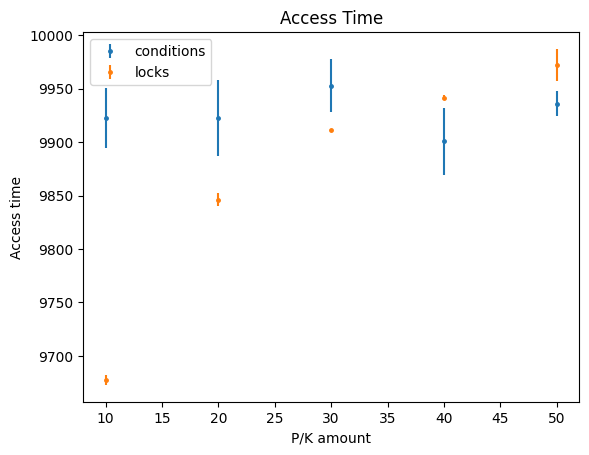

In [5]:
import matplotlib.pyplot as plt

plt.title("Access Time")
plt.xlabel("P/K amount")
plt.ylabel("Access time")
c = plt.errorbar(
    df_c["pk_amount"], 
    df_c["access_time"]["mean"], 
    df_c["access_time"]["std"],
    label="conditions",
    linestyle='None', 
    marker='.',
    ms=5
)
l = plt.errorbar(
    df_l["pk_amount"], 
    df_l["access_time"]["mean"], 
    df_l["access_time"]["std"], 
    label="locks",
    linestyle='None', 
    marker='.',
    ms=5
)
plt.legend(handles=[c,l])
plt.show()

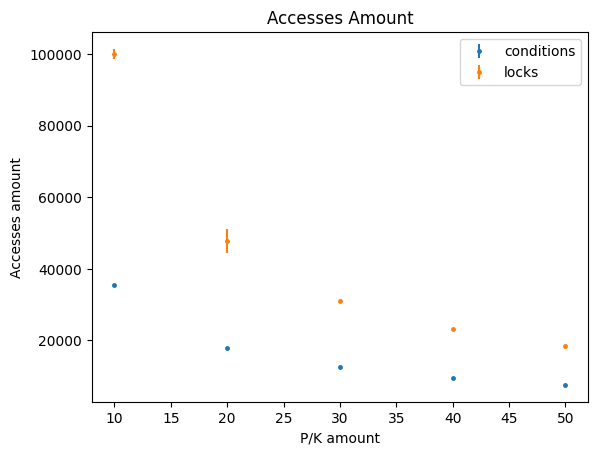

In [6]:
import matplotlib.pyplot as plt

plt.title("Accesses Amount")
plt.xlabel("P/K amount")
plt.ylabel("Accesses amount")
c = plt.errorbar(
    df_c["pk_amount"], 
    df_c["accesses_amount"]["mean"], 
    df_c["accesses_amount"]["std"],
    label="conditions",
    linestyle='None', 
    marker='.',
    ms=5
)
l = plt.errorbar(
    df_l["pk_amount"], 
    df_l["accesses_amount"]["mean"], 
    df_l["accesses_amount"]["std"], 
    label="locks",
    linestyle='None', 
    marker='.',
    ms=5
)
plt.legend(handles=[c,l])
plt.show()